### 2.4.1. 导数和微分

In [23]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import matplotlib.pyplot as plt


def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


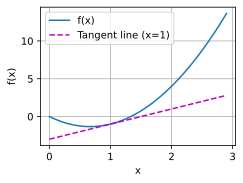

In [24]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])
plt.show()

### 2.4.3. 梯度
我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。 具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入一个n维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$
，并且输出是一个标量。 函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含n个偏导数的向量:$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$(2.4.9)
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。  
假设$\mathbf{x}$为n维向量，在微分多元函数时经常使用以下规则:  

- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$
，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$  
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$
，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$  
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$
，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$  
- $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵$\mathbf{X}$
，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$
。
正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

### Practice

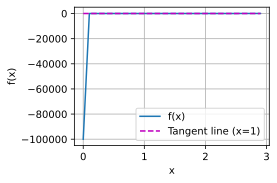

In [25]:
def f(x):
    return x ** 3 - 1.0/(x+0.00001)
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 4*x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \nabla_{\mathbf{x}} ||\mathbf{x}||_{2} = \frac{\mathbf{x}}{||\mathbf{x}||_{2}}$